<a href="https://colab.research.google.com/github/rajkumarshahu/AI-Colab/blob/main/AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

#Data Exploration and Cleaning

#### Load the data

In [2]:
data = pd.read_csv("/content/heart_2022_with_nans.csv", delimiter=None, engine='python')
print(data.head())

     State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 0.0               0.0   
1  Alabama  Female     Excellent                 0.0               0.0   
2  Alabama  Female     Very good                 2.0               3.0   
3  Alabama  Female     Excellent                 0.0               0.0   
4  Alabama  Female          Fair                 2.0               0.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                 No   
1                                                NaN                 No   
2  Within past year (anytime less than 12 months ...                Yes   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours RemovedTeeth HadHeartAttack  ... HeightInMeters  \
0         8.0          NaN             

#### Summary statistics

In [3]:
summary_statistics = data.describe(include='all')
summary_statistics

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
count,445132,445132,443934,434205.000000,436065.000000,436824,444039,439679.000000,433772,442067,...,416480.000000,403054.000000,396326.000000,398558,379005,398011,368092,362616,394509,394368
unique,54,2,5,NaN,NaN,4,2,NaN,4,2,...,NaN,NaN,NaN,2,2,2,2,4,2,3
top,Washington,Female,Very good,NaN,NaN,Within past year (anytime less than 12 months ...,Yes,NaN,None of them,No,...,NaN,NaN,NaN,Yes,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
freq,26152,235893,148444,NaN,NaN,350944,337559,NaN,233455,416959,...,NaN,NaN,NaN,210891,249919,209256,215604,121493,377324,270055
mean,NaN,NaN,NaN,4.347919,4.382649,NaN,NaN,7.022983,NaN,NaN,...,1.702691,83.074470,28.529842,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,8.688912,8.387475,NaN,NaN,1.502425,NaN,NaN,...,0.107177,21.448173,6.554889,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,1.000000,NaN,NaN,...,0.910000,22.680000,12.020000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,6.000000,NaN,NaN,...,1.630000,68.040000,24.130000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,7.000000,NaN,NaN,...,1.700000,80.740000,27.440000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,3.000000,5.000000,NaN,NaN,8.000000,NaN,NaN,...,1.780000,95.250000,31.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Check and handle missing values

In [4]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

missing_values_after_handling = data.isnull().sum()
missing_values_after_handling

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

# Visualizing Data Distribution


#### 1. Outcome Variable

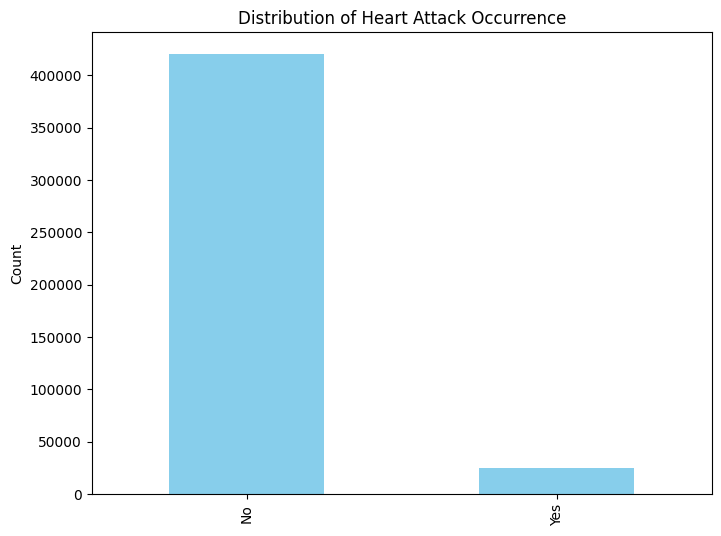

In [5]:
plt.figure(figsize=(8, 6))
data['HadHeartAttack'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Heart Attack Occurrence')
plt.ylabel('Count')
plt.show()

#### 2. Health Metrics

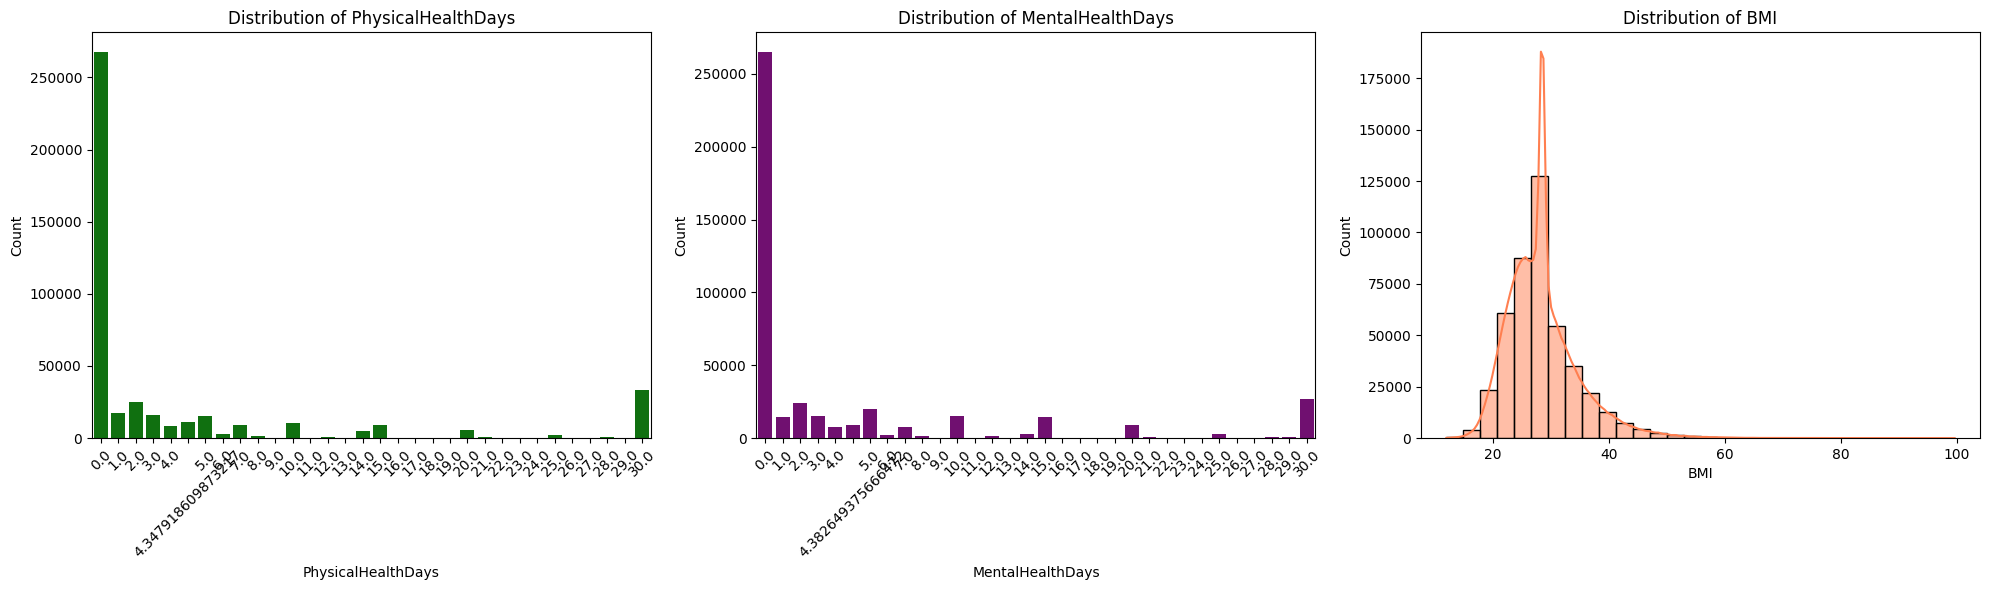

In [6]:
plt.figure(figsize=(20, 6))

# 1. PhysicalHealthDays
plt.subplot(1, 3, 1)
sns.countplot(data=data, x='PhysicalHealthDays', color='green')
plt.title('Distribution of PhysicalHealthDays')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating x-axis tick labels

# 2. MentalHealthDays
plt.subplot(1, 3, 2)
sns.countplot(data=data, x='MentalHealthDays', color='purple')
plt.title('Distribution of MentalHealthDays')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating x-axis tick labels

# 3. BMI
plt.subplot(1, 3, 3)
sns.histplot(data['BMI'], kde=True, color='coral', bins=30)
plt.title('Distribution of BMI')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

#### 3. Lifestyle Habits

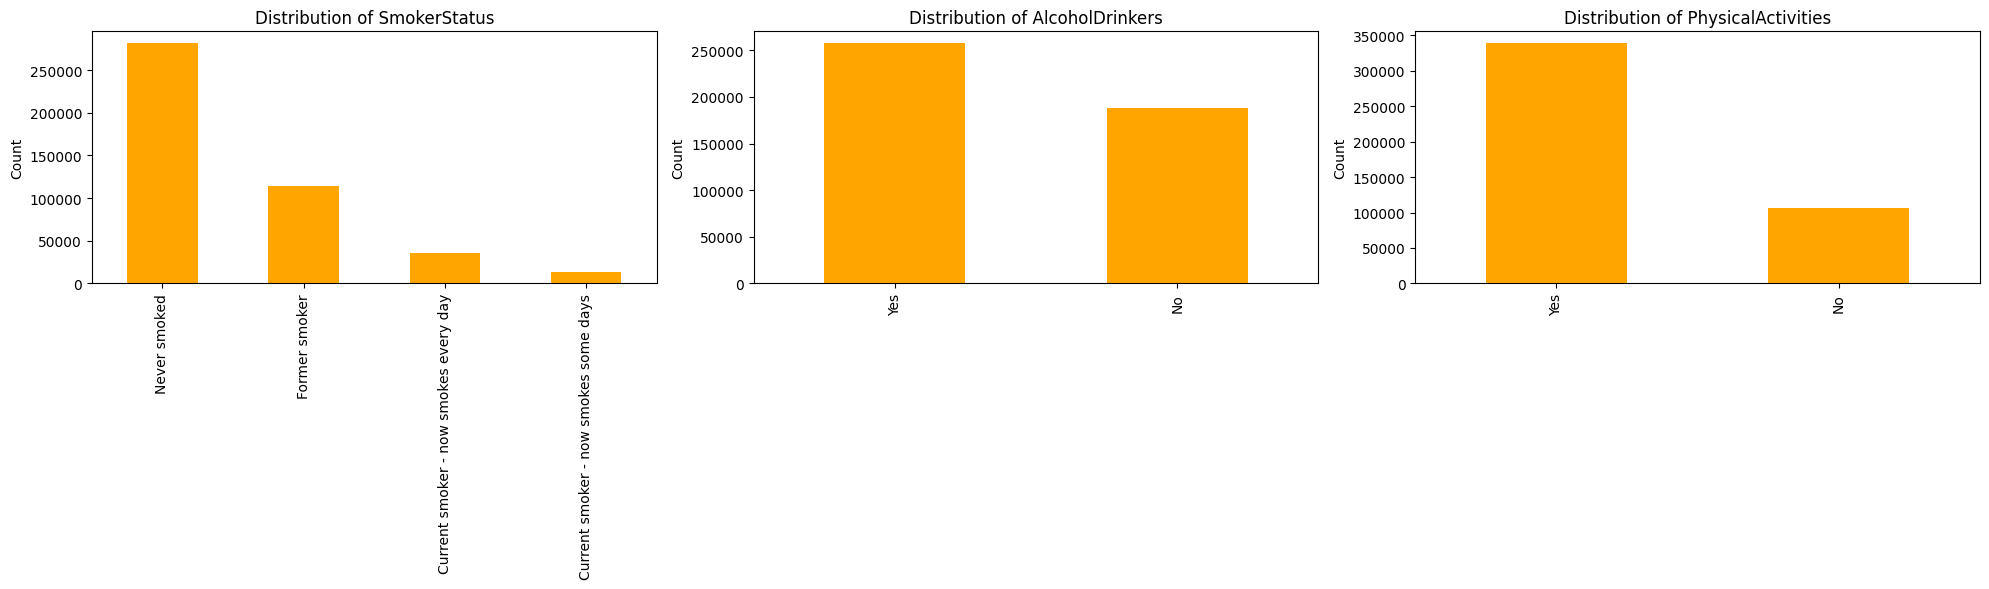

In [7]:
plt.figure(figsize=(20, 6))
lifestyle_habits = ['SmokerStatus', 'AlcoholDrinkers', 'PhysicalActivities']
for i, col in enumerate(lifestyle_habits, 1):
    plt.subplot(1, 3, i)
    data[col].value_counts().plot(kind='bar', color='orange')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count')
    plt.tight_layout()

plt.show()

#### 4. Other Health Conditions

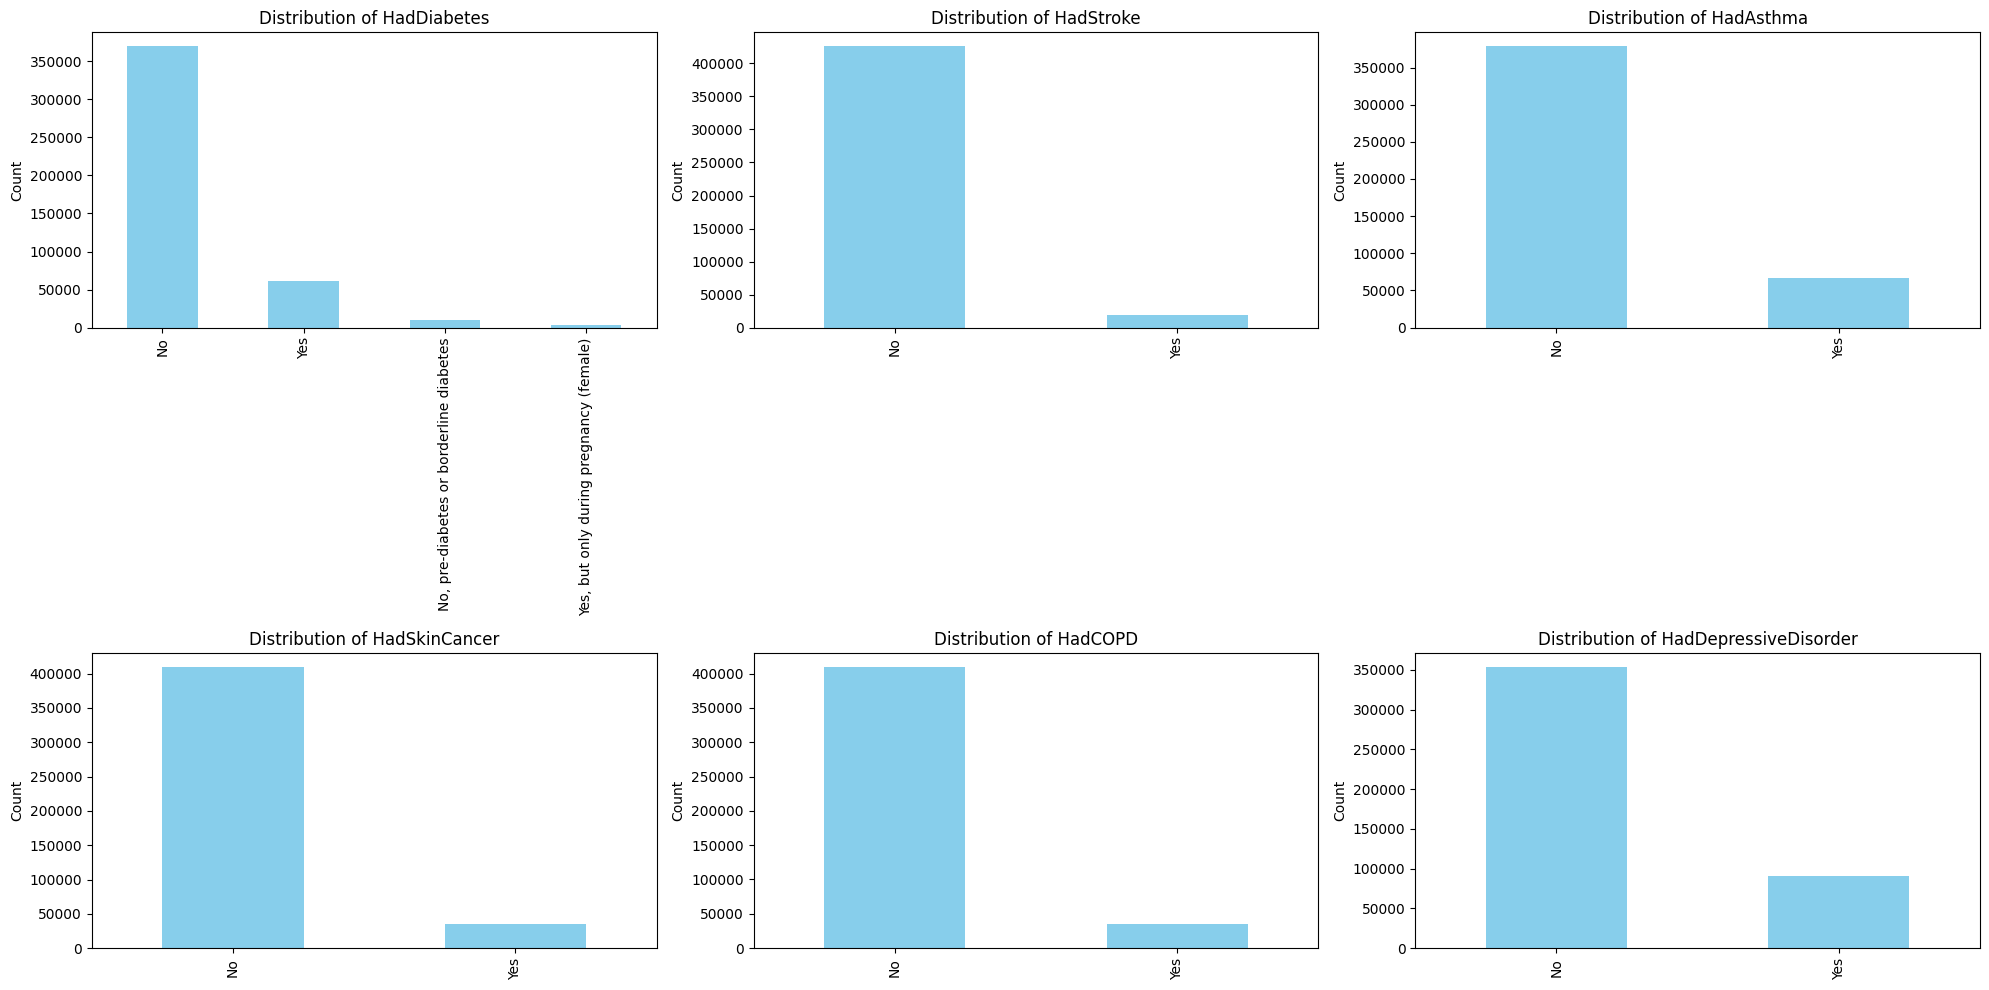

In [8]:
plt.figure(figsize=(20, 10))
health_conditions = ['HadDiabetes', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder']
for i, col in enumerate(health_conditions, 1):
    plt.subplot(2, 3, i)
    data[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count')
    plt.tight_layout()

plt.show()

#### 5. General Health Perception

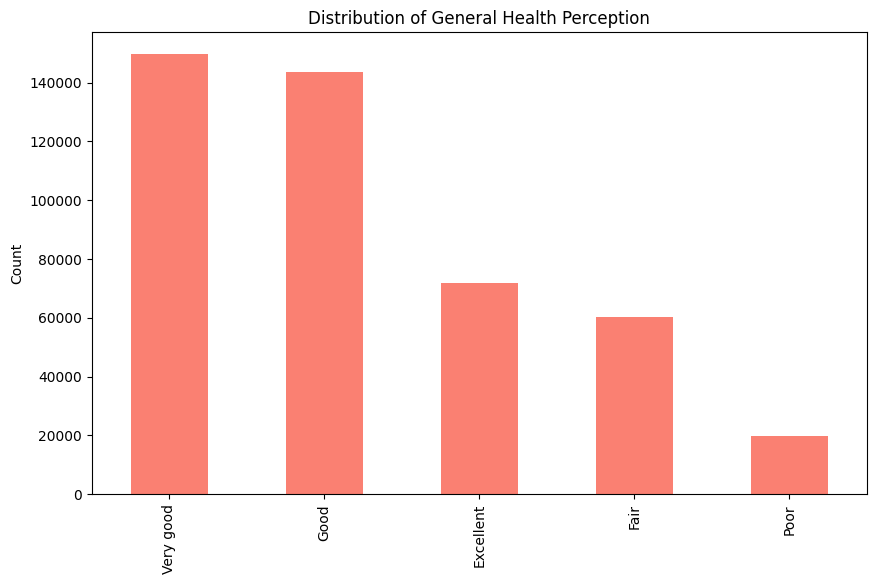

In [9]:
plt.figure(figsize=(10, 6))
data['GeneralHealth'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribution of General Health Perception')
plt.ylabel('Count')
plt.show()

#### 6. Age Distribution

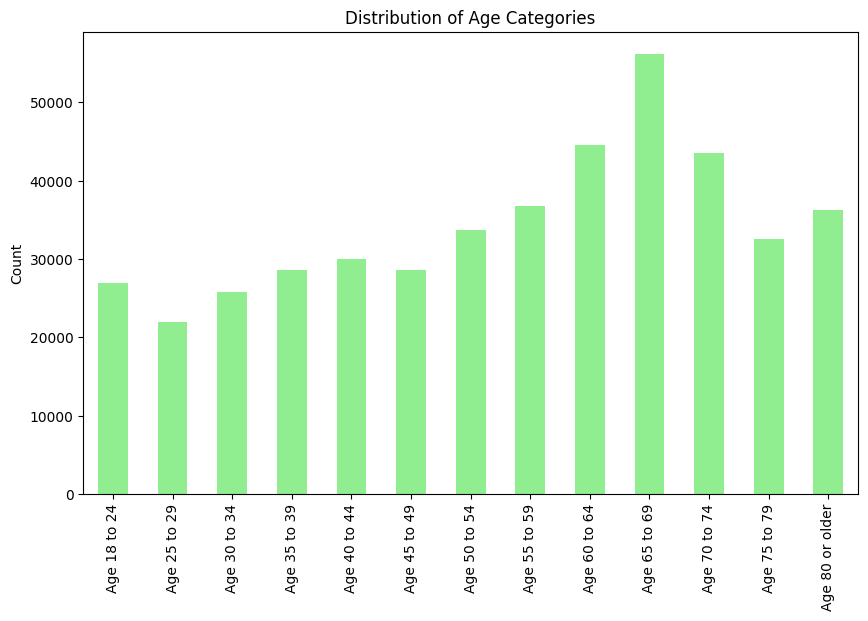

In [10]:
plt.figure(figsize=(10, 6))
data['AgeCategory'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Age Categories')
plt.ylabel('Count')
plt.show()

# Feature Engineering and Feature Selection

#### One-hot encoding categorical variables

In [11]:
data_encoded = pd.get_dummies(data, columns=['SmokerStatus', 'GeneralHealth', 'RaceEthnicityCategory', 'AgeCategory', 'PhysicalActivities', 'LastCheckupTime'])

#### Convert the target variable 'HadHeartAttack' to binary format

In [12]:
data_encoded['HadHeartAttack'] = data_encoded['HadHeartAttack'].map({'No': 0, 'Yes': 1})

#### Compute correlations only for numeric columns

In [13]:
correlations = data_encoded.select_dtypes(include=['int64', 'float64', 'uint8']).corr()['HadHeartAttack'].sort_values(ascending=False)


#### Select relevant features based on correlation with target


In [14]:
relevant_features = correlations[abs(correlations) > 0.05].index.tolist()

#### Safely removing 'HadHeartAttack' from the list

In [15]:
data_selected = data_encoded.drop(columns=['WeightInKilograms', 'PhysicalActivities_No'])

#### Selecting relevant features based on correlation with target

In [16]:
if 'HadHeartAttack' in relevant_features:
    relevant_features.remove('HadHeartAttack')

# Model Selection and Training

#### Splitting the data into training and testing sets (80% train, 20% test)


In [17]:
X = data_encoded[relevant_features]
y = data_encoded['HadHeartAttack']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Train Multiple Models and Evaluate their performances


In [18]:
# Define models to train
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    # 'Support Vector Machine': SVC(random_state=42)  # SVM might be computationally expensive for large datasets
}

# Train models and evaluate their performances
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name}")
    print(f"Accuracy: {accuracy*100:.2f}%")
    print(classification_report(y_test, y_pred))


Logistic Regression
Accuracy: 94.23%
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     83889
           1       0.00      0.00      0.00      5138

    accuracy                           0.94     89027
   macro avg       0.47      0.50      0.49     89027
weighted avg       0.89      0.94      0.91     89027



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Random Forest
Accuracy: 94.15%
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     83889
           1       0.22      0.01      0.01      5138

    accuracy                           0.94     89027
   macro avg       0.58      0.50      0.49     89027
weighted avg       0.90      0.94      0.91     89027


Gradient Boosting
Accuracy: 94.23%
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     83889
           1       0.00      0.00      0.00      5138

    accuracy                           0.94     89027
   macro avg       0.47      0.50      0.49     89027
weighted avg       0.89      0.94      0.91     89027



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The results above show a clear indication of a class imbalance problem. The models are predicting the majority class (0) almost exclusively and are struggling to predict the minority class (1).

The results provide valuable insights:

**1. High Accuracy, But Imbalanced Predictions:** All models have high accuracy, but this can be misleading due to the class imbalance in the dataset. As seen in the results, the models predict the majority class almost exclusively. The accuracy is high because the majority class (0) has a much larger representation in the dataset compared to the minority class (1).

**2. Warnings Related to Precision and F-score:** The warnings indicate that for some models, no samples were predicted for the minority class (1). This is further evidence of the models' inability to effectively predict the minority class due to the imbalance.

**3. Recall for Minority Class is Low:** Even in the Random Forest model, where some samples of the minority class were predicted, the recall for that class is very low, indicating that the model missed a large proportion of actual positive cases.

# Addressing Class Imbalance for Improved Heart Disease Prediction

#### Oversampling with SMOTE

In [19]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

#### Using Class Weights with Random Forest

In [20]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)

#### Evaluating with ROC-AUC

In [21]:
model.fit(X_resampled, y_resampled)

y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC: {roc_auc:.2f}")

ROC-AUC: 0.76


An ROC-AUC score of `0.76` is a reasonably good result, especially considering the challenges posed by imbalanced datasets. Here's a brief interpretation of the score:

- An ROC-AUC score of `0.5` means the model's predictions are no better than random guessing.
- A perfect model would have an ROC-AUC score of `1.0`.
- The score of `0.76` indicates that the model has a good capability to distinguish between the positive class (having heart disease) and the negative class (not having heart disease).

# Comprehensive Model Evaluation and Enhancement

#### Use the default Random Forest model for a baseline



In [22]:

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_resampled, y_resampled)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.69      0.81     83889
           1       0.12      0.73      0.21      5138

    accuracy                           0.69     89027
   macro avg       0.55      0.71      0.51     89027
weighted avg       0.93      0.69      0.77     89027



The results indicate a significant improvement in the recall for the positive class (indicating heart disease) when compared to the previous results. The positive class has jumped to 0.73 from nearly 0. This is a significant achievement, especially for medical applications, where false negatives can be detrimental.

However, the precision for the positive class is low, which means that while the model is catching a large proportion of the actual heart disease cases, it's also misclassifying many healthy cases as having heart disease. This is a trade-off often encountered when dealing with imbalanced datasets.

#### Feature Importance


Since we've been working with a Random Forest model, we can easily extract feature importances to understand which features are the most influential in making predictions.

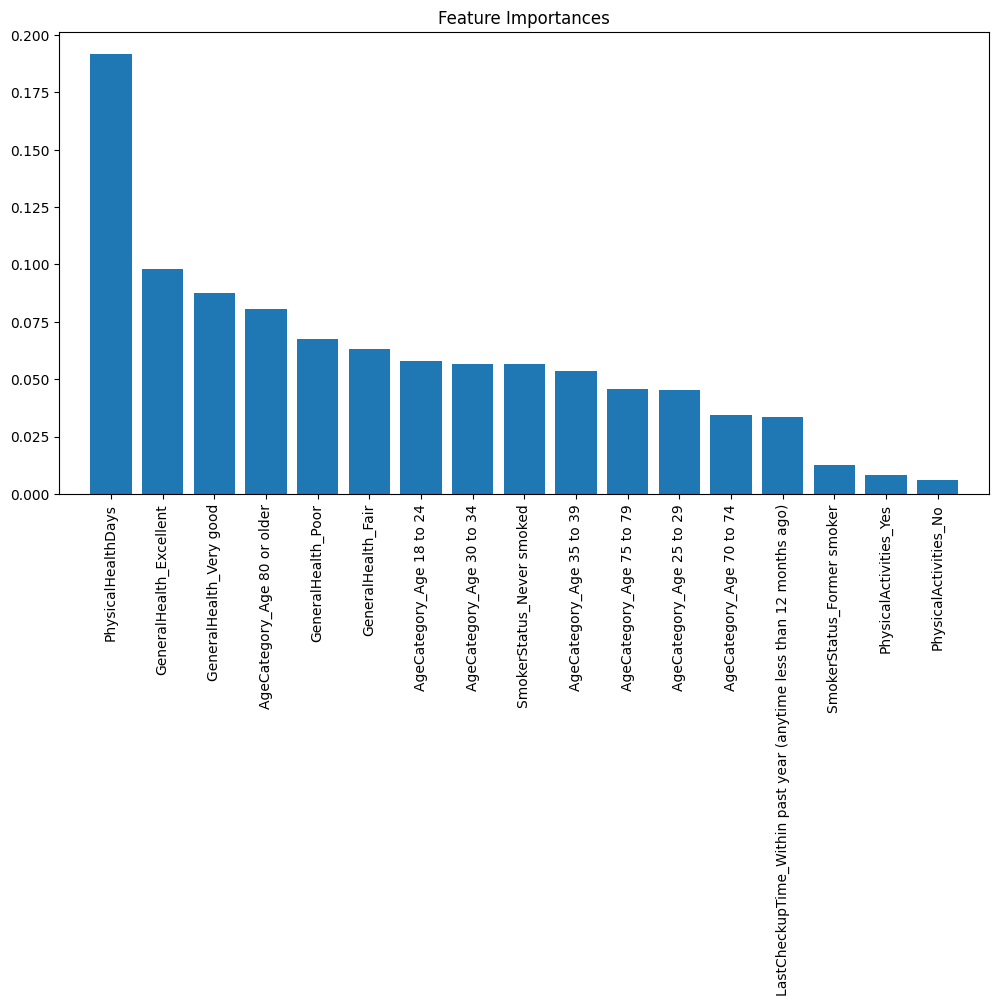

In [23]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()